# Name : Daivik Gururaj Pelathur

# Batch : October 2021

# Domain : Data Science and Business Analytics 

## Task 1 : Exploratory Data Analysis - Retail


#### Objective:
##### ● Perform ‘Exploratory Data Analysis’ on dataset  ‘SampleSuperstore’
##### ● As a business manager, try to find out the weak areas where you can work to make more profit.
##### ● What all business problems you can derive by exploring the  data? 

### Data-preprocessing

In [ ]:
### Import all necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [ ]:
#Checking Missing Values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# Chaecking the dupilication in data
data.duplicated().sum()

17

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
#Deleting the Variable.
feature=['Postal Code','Country']
data1 = data.drop(columns=feature,axis=1)

In [ ]:
#Correlation Between Variables.
correlations = data1.corr()
correlations

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


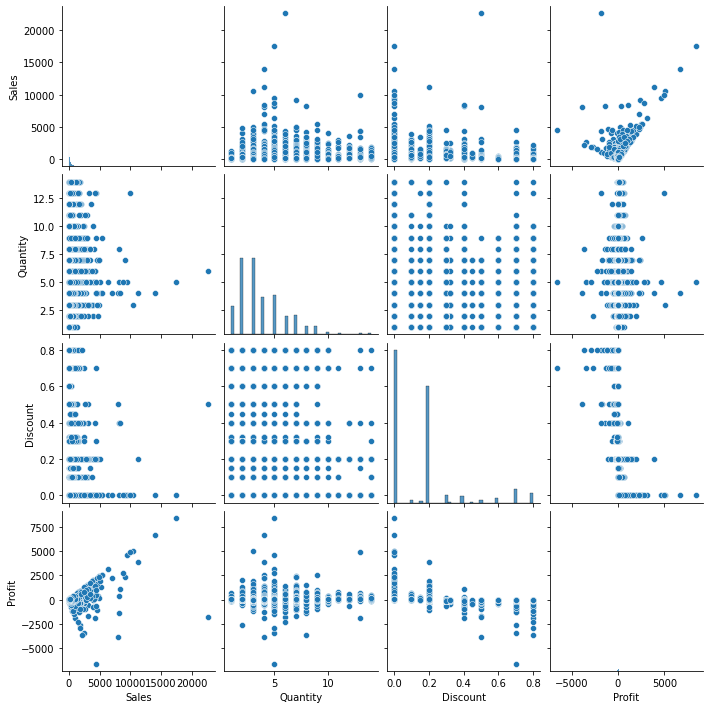

In [ ]:
sns.pairplot(data1)

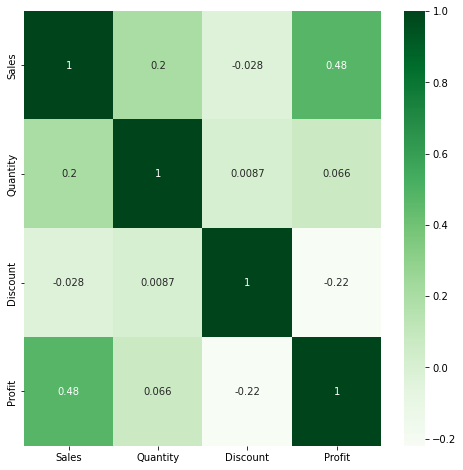

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlations,annot=True,cmap='Greens')

In [ ]:
# Covariance of columns
covariance = data1.cov()
covariance

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


# Exploratory Data Analysis

### Analysis on Categorical data

In [ ]:
catdata = data1.select_dtypes(include='object')
catdata.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')

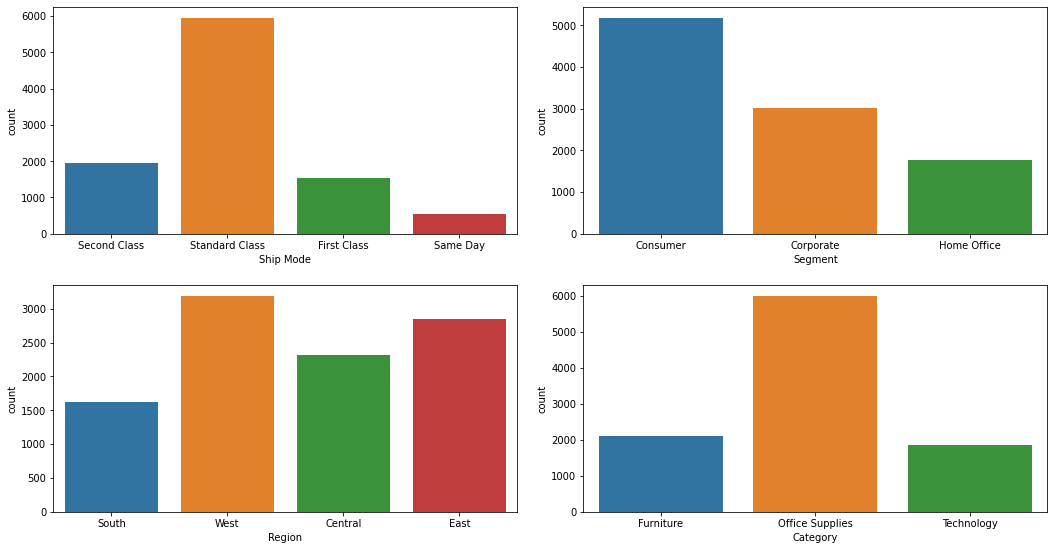

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
figure,ax = plt.subplots(2,2)

plt.subplot(2,2,1)
sns.countplot(data1['Ship Mode'])
figure.tight_layout(pad = 2)

plt.subplot(2,2,2)
sns.countplot(data1['Segment'])
figure.tight_layout(pad = 2)

plt.subplot(2,2,3)
sns.countplot(data1['Region'])
figure.tight_layout(pad = 2.0)

plt.subplot(2,2,4)
sns.countplot(data1['Category'])
figure.tight_layout(pad = 2.0)

plt.show()

### Analysis on numerical data

In [ ]:
numdata = data1.select_dtypes(include=np.number)
numdata.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

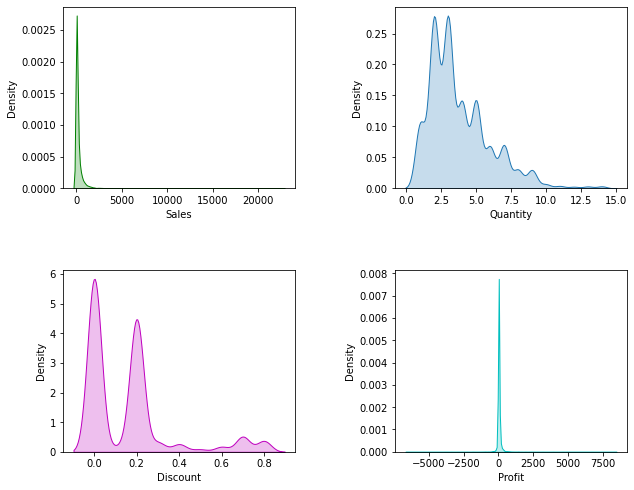

In [ ]:
rcParams['figure.figsize'] = 10,8
figure,ax = plt.subplots(2,2)

plt.subplot(2,2,1)
sns.kdeplot(data1['Sales'],color='g',shade='True')
figure.tight_layout(pad = 5)

plt.subplot(2,2,2)
sns.kdeplot(data1['Quantity'],shade='True')
figure.tight_layout(pad = 5)

plt.subplot(2,2,3)
sns.kdeplot(data1['Discount'],color='m',shade='True')
figure.tight_layout(pad = 5.0)

plt.subplot(2,2,4)
sns.kdeplot(data1['Profit'],color='c',shade='True')
figure.tight_layout(pad = 5.0)

plt.show()

### Category vs Sub-Category

In [ ]:
plt.figure(figsize=(10,6))
plt.bar('Sub-Category','Category', data=data1)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

NameError: ignored

In [ ]:
plt.figure(figsize=(13,5))
sns.violinplot('Category','Quantity', data=data1, hue='Category',width=1)

plt.title('Category vs Quantity',loc='center')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.legend(loc='best')
plt.show()

### Number of stores in each state

In [ ]:
# Number of records in each State
data1['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

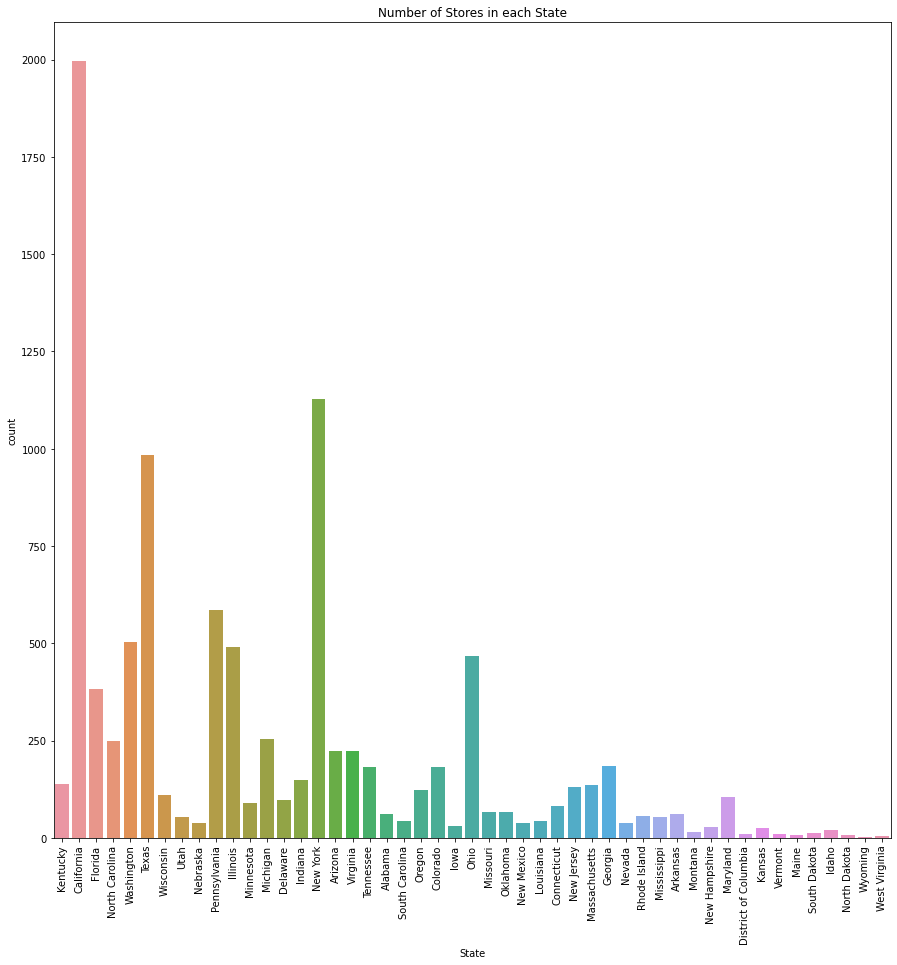

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=data1['State'])
plt.xticks(rotation=90)
plt.title("Number of Stores in each State")
plt.show()

From above plot we can see that the number of stores in the state of California is the highest with a value of 1996

### Sub-Category items sold

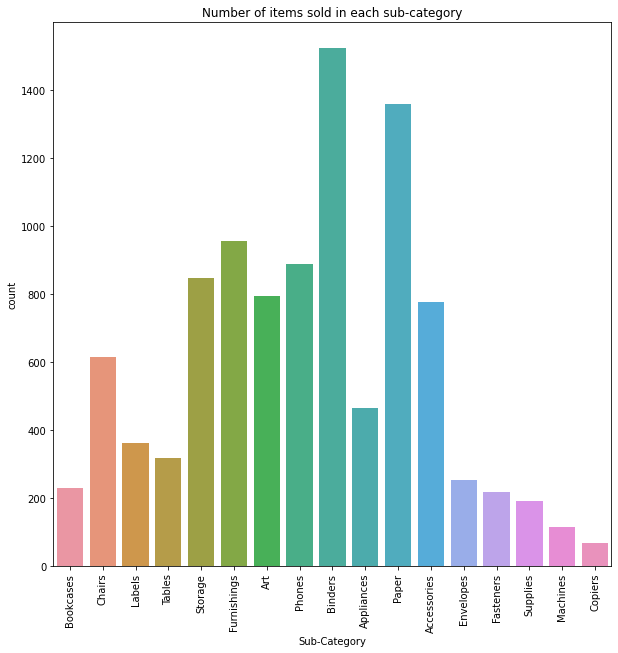

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data1['Sub-Category'])
plt.xticks(rotation=90)
plt.title("Number of items sold in each sub-category")
plt.show()

Sub-Category Binders has the highest number of items While the least number of items is in Sub-Category Copiers

### Product Category wise analysis

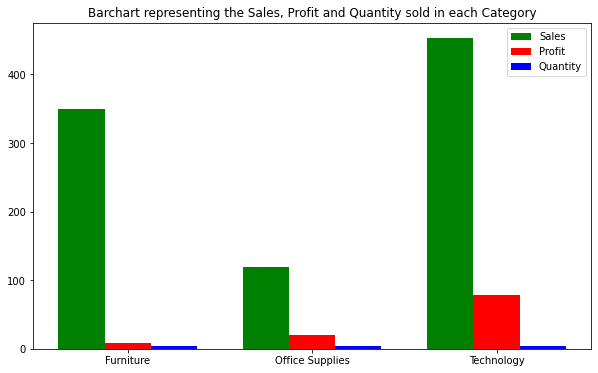

In [ ]:
plt.figure(figsize=(10,6))

X = np.arange(len(data1['Category'].value_counts()))

plt.bar(X, data1.groupby(['Category'])['Sales'].mean(), color = 'g', width = 0.25)
plt.bar(X + 0.25, data1.groupby(['Category'])['Profit'].mean(), color = 'r', width = 0.25)
plt.bar(X + 0.5, data1.groupby(['Category'])['Quantity'].mean(), color = 'b', width = 0.25)

plt.xticks([i + 0.25 for i in range(3)], ['Furniture','Office Supplies', 'Technology'])
plt.legend(['Sales', 'Profit', 'Quantity'])
plt.title("Barchart representing the Sales, Profit and Quantity sold in each Category")
plt.show()

Technology Category has the highest average sales. Profit earned by this category is also the highest. Office supplies get the least average sales among the 3 categories. 

### Sales and Profit for differencet sub-categories

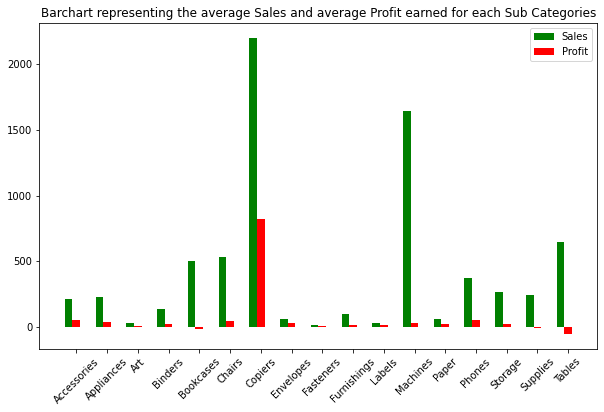

In [ ]:
plt.figure(figsize=(10,6))

X = np.arange(len(data1['Sub-Category'].value_counts()))

plt.bar(X, data1.groupby(['Sub-Category'])['Sales'].mean(), color = 'g', width = 0.25)
plt.bar(X + 0.25, data1.groupby(['Sub-Category'])['Profit'].mean(), color = 'r', width = 0.25)

plt.xticks([i + 0.25 for i in range(17)], data1.groupby(['Sub-Category'])['Sales'].mean().index)

plt.legend(['Sales', 'Profit'])
plt.xticks(rotation=45)
plt.title("Barchart representing the average Sales and average Profit earned for each Sub Categories")
plt.show()

Copiers has the highest sales as well as profit earned. The next sub category having the highest average sales in machines. Tables and supplies have high average sales but it is in loss.

### Discount-Profit relation

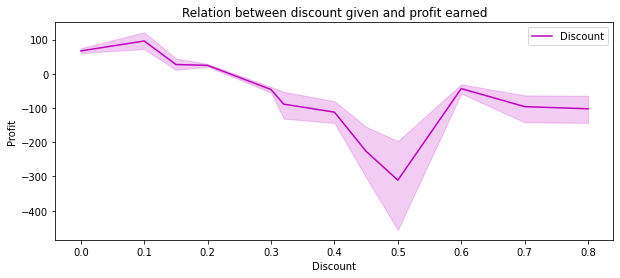

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data1 , color='m',label='Discount')
plt.title('Relation between discount given and profit earned')
plt.legend()
plt.show()

### State wise analysis

In [ ]:
def state_wise_analysis(states):
    product_data = data1.groupby(['State'])
    
    for st in states:
        data = product_data.get_group(st).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (25,5))
        fig.suptitle(st, fontsize=14)        
        ax_index = 0
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(category).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(category)
            ax_index +=1
        fig.show()

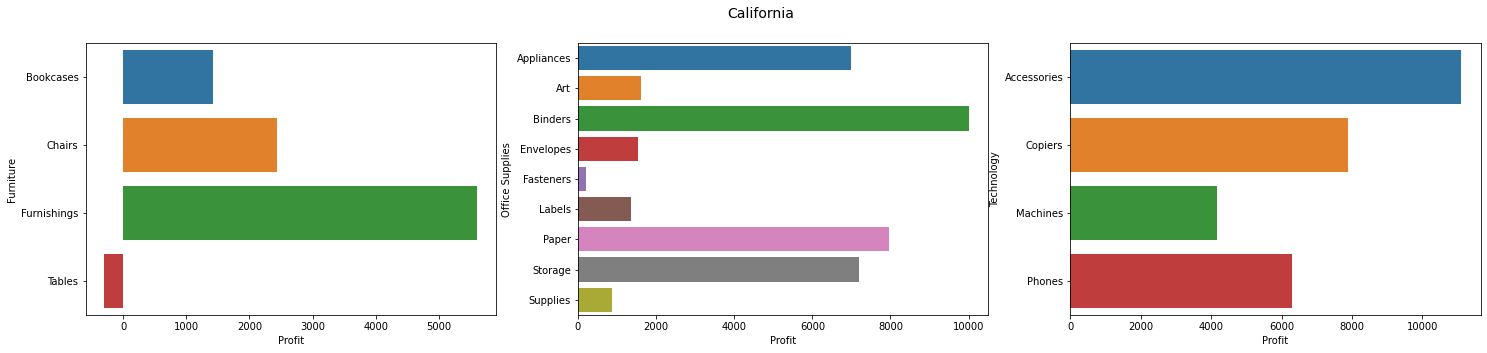

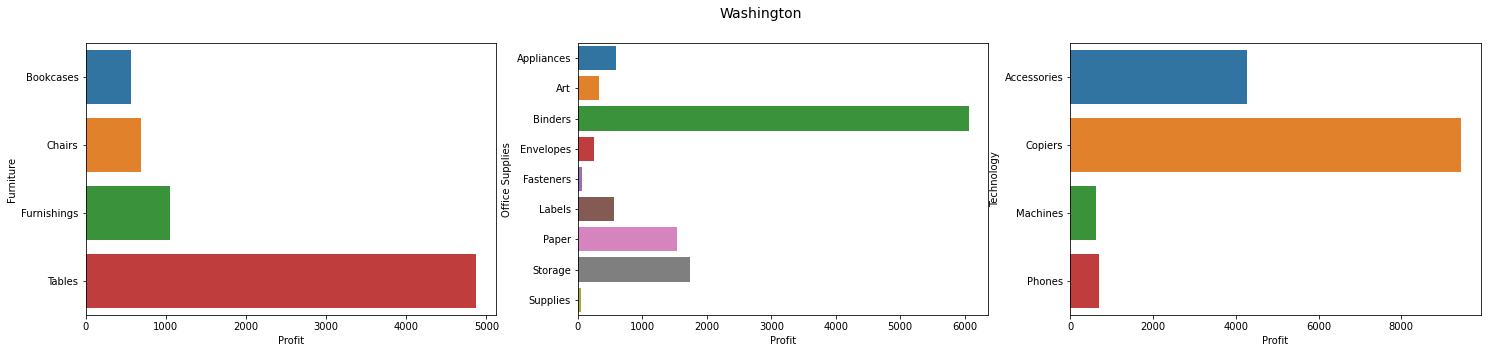

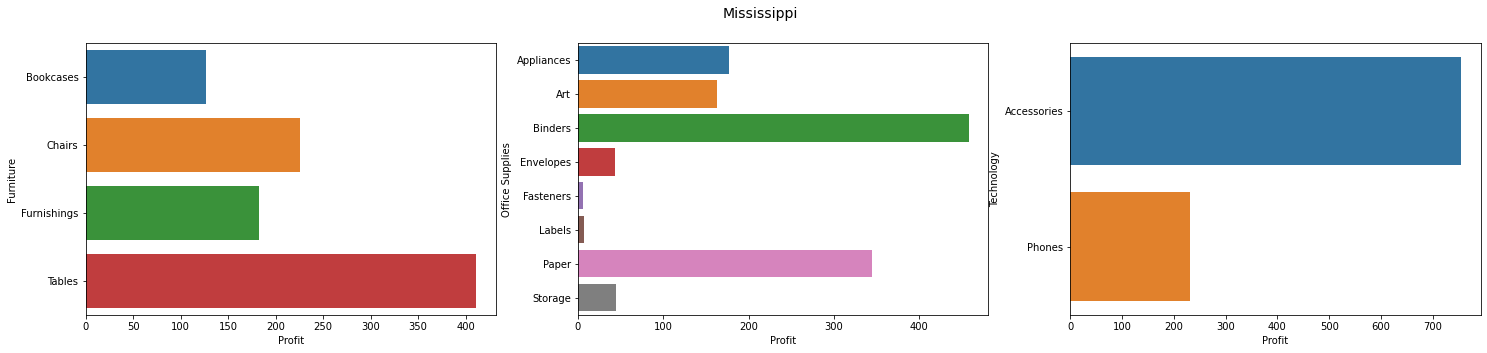

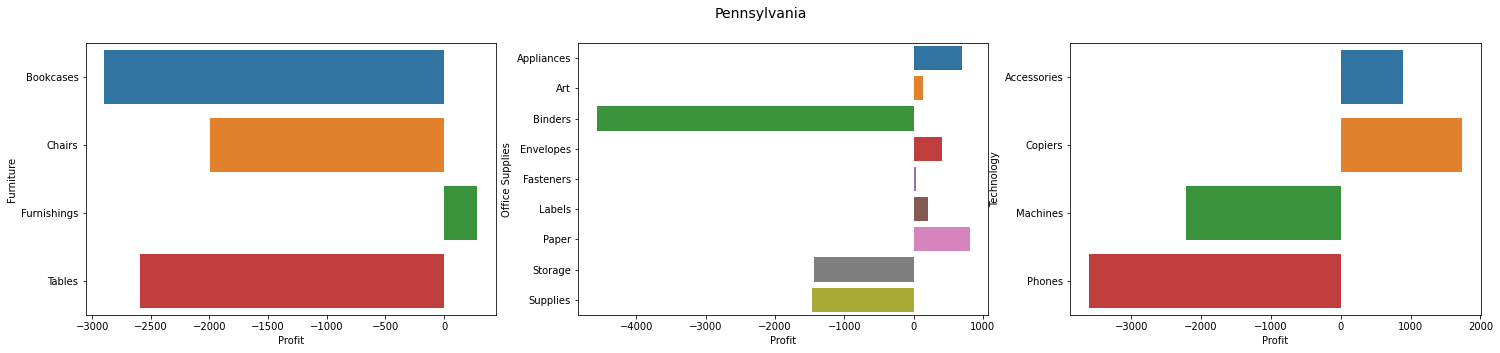

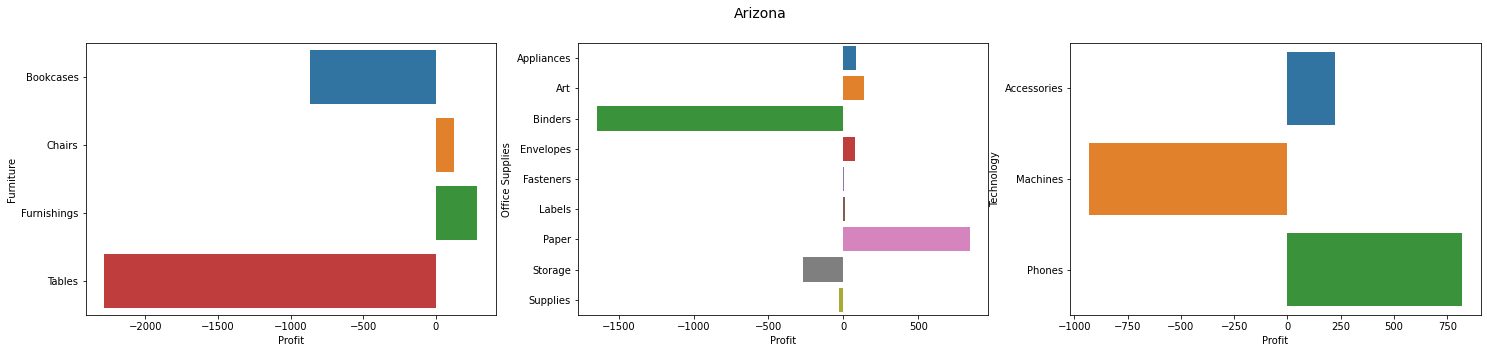

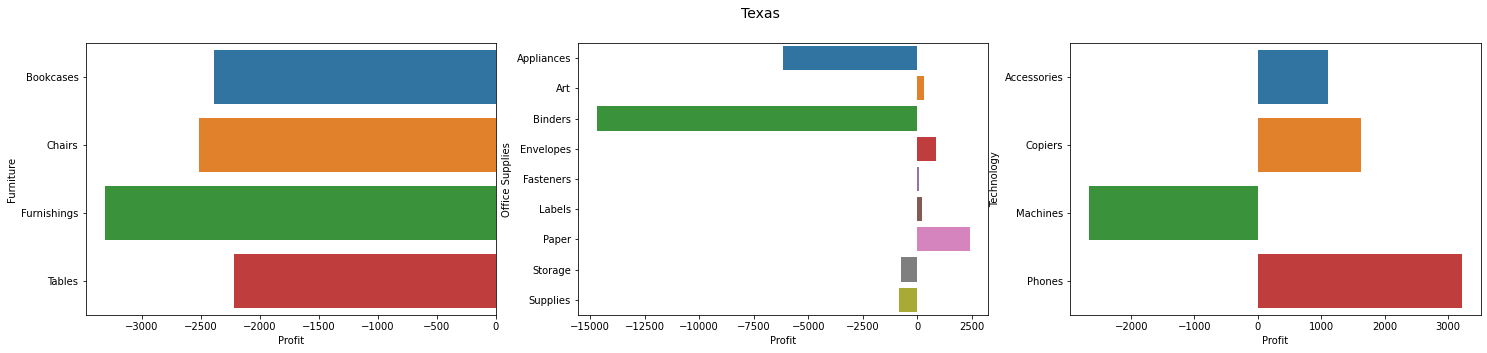

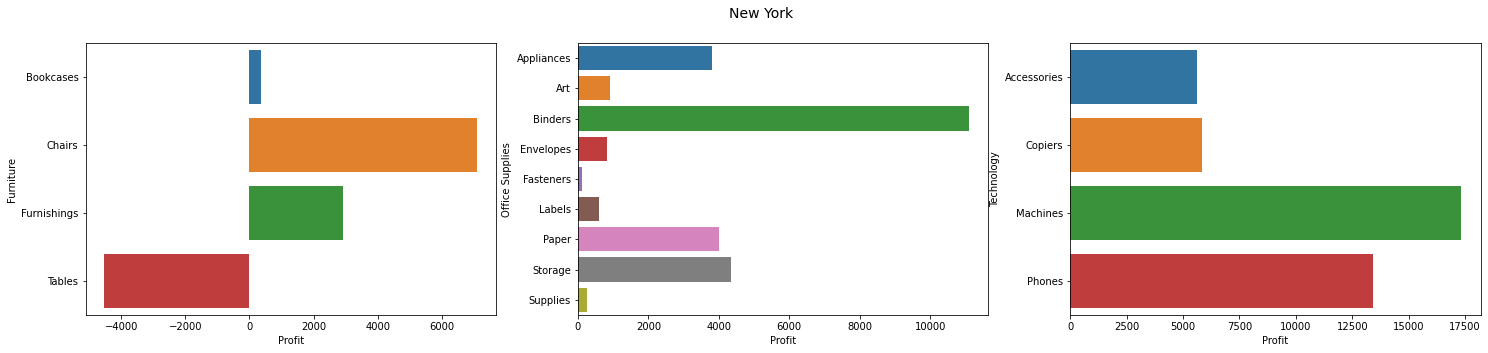

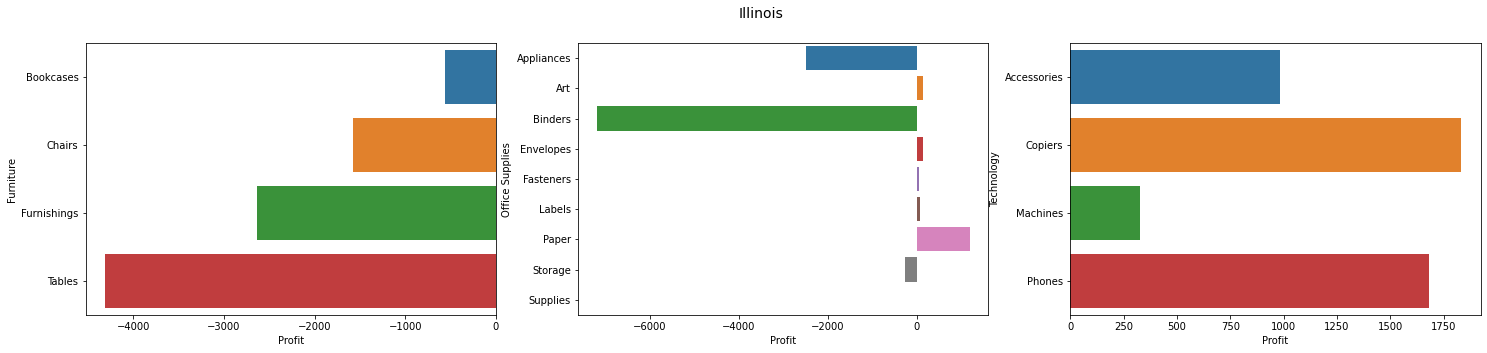

In [ ]:
states = ['California', 'Washington', 'Mississippi','Pennsylvania', 'Arizona', 'Texas','New York','Illinois']

state_wise_analysis(states)

### Conclusions:

**1. From the above data analysis and visualization we can see which sub-categories are bringing in low/high profits. We can also observe which states have high or low sales.** 

**2. There are a few states that have a very large number of stores. Proper business planning in these stores will hugely impact the profits of the company.**

**3. States with few superstores should be focused more on expanding as it could be a potential for new customers.**

**4. From the discount-profit line chart we can see that as the discount increases the loss incurred by the store also increases. So, discounts during festivals, clearance sales, end of season sales, etc are affecting the profit earned during the long run. But, discounts can not be stopped as they are required so that the stores can make space for new stock. Discounts also gains the company long-term customers which are very necessary for a company's growth.**

**5. There are few sub-categories that are causing the store to lose money. Business plans need to be implemented to reduce this loss.**


# END